In [390]:
import sympy as sym
from IPython.display import display, Math
import matplotlib.pyplot as plt

sym.init_printing()

In [391]:
def intersecting_point(slope1, constant1, slope2, constant2):
    # Step 1: Homogenize both line equations
    l1 = slope_intercept_formula.subs({m: slope1, b: constant1})
    l2 = slope_intercept_formula.subs({m: slope2, b: constant2})

    # Step 2: Solve the 1st equation for x
    x_formula = sym.solve(l1, x)[0]

    # Step 3: Substitute Step 2 equation into the second equation, solving for y
    y_value = sym.solve(l2.subs({x: x_formula}))[0]

    # Step 4: Substitute y value into 1st equation and solve for x
    x_value = sym.solve(l2.subs({x: y_value}))[0]

    print('Solution = [%s,%s]' % ("{:.1f}".format(x_value), "{:.1f}".format(y_value)))
    plt.plot(x_value, y_value, 'o')
    return [x_value, y_value]

In [392]:
b, m, x, y = sym.symbols('b, m, x,y')
slope_intercept_formula = m * x - y + b

formulas = {
    "y_intercept_formula": sym.solve(slope_intercept_formula, x)[0],
    "x_intercept_formula": sym.solve(slope_intercept_formula, y)[0],
    "slope_formula": sym.solve(slope_intercept_formula, m)[0],
    'constant_formula': sym.solve(slope_intercept_formula, b)[0]
}

display(Math('0=%s' % sym.latex(slope_intercept_formula)))
display(Math('x=%s' % sym.latex(formulas['y_intercept_formula'])))
display(Math('y=%s' % sym.latex(formulas['x_intercept_formula'])))
display(Math('m=%s' % sym.latex(formulas['slope_formula'])))
display(Math('b=%s' % sym.latex(formulas['constant_formula'])))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [393]:
def graph_system_of_equation(lines):
    line_data = {}

    for i in range(0, len(lines)):
        x_intercept = sym.solve(formulas['x_intercept_formula'].subs({m: lines[i][0], b: lines[i][1]}))[0]
        y_intercept = sym.solve(formulas['y_intercept_formula'].subs({m: lines[i][0], b: lines[i][1]}))[0]

        line_data['line' + str(i)] = {
            'y': 0,
            'm': lines[i][0],
            'b': lines[i][1],
            'x': [x_intercept, 0]
        }

        plt.plot([0, x_intercept], [y_intercept, 0], label='y =%sx + %s' % (lines[i][0], lines[i][1]))

    # Use sympy to plot the point of intersection
    solution = intersecting_point(line_data['line0']['m'], line_data['line0']['b'], line_data['line1']['m'],
                                  line_data['line1']['b'])

    # Style Chart
    plt.grid()

    # Draw the x and y axis
    axis = plt.gca()
    plt.plot(axis.get_xlim(), [0, 0], 'k--')
    plt.plot([0, 0], axis.get_ylim(), 'k--')

    plt.legend()
    plt.show()

Solution = [2.0,1.0]


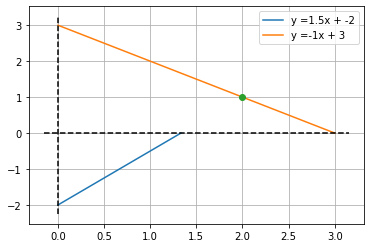

In [394]:
# [[m,b],[m,b]]
graph_system_of_equation([[3 / 2, -2], [-1, 3]])